In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from imutils import paths

In [2]:
ImageData=[]
ImageLabels=[]
datapath='./PSL'
my_list = os.listdir(datapath)
print(my_list)

['Ain', 'Aliph', 'aRay', 'Bari yeh', 'Bay', 'Chay', 'Chhoti yeh', 'Daal', 'Ddaal', 'Dhaal', 'dhay', 'Dhuaad', 'Fay', 'Gaaf', 'Ghain', 'hamza', 'Hay', 'hey', 'Jeem', 'Kaaf', 'Khay', 'Laam', 'Meem', 'Noon', 'Pay', 'Quaaf', 'Ray', 'Seen', 'Sheen', 'Suaad', 'Tay', 'Tey', 'Thay', "Toay'n", 'Vao', 'Zay', "Zoay'n"]


In [3]:
pathToImages=list(paths.list_images(datapath))
print(pathToImages)


['./PSL\\Ain\\W_0.png', './PSL\\Ain\\W_1.png', './PSL\\Ain\\W_10.png', './PSL\\Ain\\W_11.png', './PSL\\Ain\\W_12.png', './PSL\\Ain\\W_13.png', './PSL\\Ain\\W_14.png', './PSL\\Ain\\W_15.png', './PSL\\Ain\\W_16.png', './PSL\\Ain\\W_17.png', './PSL\\Ain\\W_18.png', './PSL\\Ain\\W_19.png', './PSL\\Ain\\W_2.png', './PSL\\Ain\\W_20.png', './PSL\\Ain\\W_21.png', './PSL\\Ain\\W_22.png', './PSL\\Ain\\W_23.png', './PSL\\Ain\\W_24.png', './PSL\\Ain\\W_25.png', './PSL\\Ain\\W_26.png', './PSL\\Ain\\W_27.png', './PSL\\Ain\\W_28.png', './PSL\\Ain\\W_29.png', './PSL\\Ain\\W_3.png', './PSL\\Ain\\W_30.png', './PSL\\Ain\\W_31.png', './PSL\\Ain\\W_32.png', './PSL\\Ain\\W_33.png', './PSL\\Ain\\W_34.png', './PSL\\Ain\\W_35.png', './PSL\\Ain\\W_36.png', './PSL\\Ain\\W_37.png', './PSL\\Ain\\W_38.png', './PSL\\Ain\\W_39.png', './PSL\\Ain\\W_4.png', './PSL\\Ain\\W_5.png', './PSL\\Ain\\W_6.png', './PSL\\Ain\\W_7.png', './PSL\\Ain\\W_8.png', './PSL\\Ain\\W_9.png', './PSL\\Aliph\\A_1.png', './PSL\\Aliph\\A_10.png'

In [4]:
ImageData=[]
ImageLabels=[]
for images in pathToImages:
    label=images.split(os.path.sep)[-2]
    #print(label)
    if label not in my_list:
     continue
    if label == 'Aliph':
        label = 1
    elif label == 'Bay':
        label = 2
    elif label == 'Pay':
        label = 3    
    elif label == 'Tay':
        label = 4   
    elif label == 'Tey':
        label = 5
    elif label == 'Thay':
        label = 6
    elif label == 'Jeem':
        label = 7
    elif label == 'Chay':
        label = 8
    elif label == 'hey':
        label = 9       
    elif label == 'Khay':
        label = 10
    elif label == 'Daal':
        label = 11              
    elif label == 'Ddaal':
        label = 12
    elif label == 'Dhaal':
        label = 13         
    elif label == 'Ray':
        label = 14    
    elif label == 'aRay':
        label = 15
    elif label == 'Zay':
        label = 16
    elif label == 'dhay':
        label = 17
    elif label == 'Seen':
        label = 18
    elif label == 'Sheen':
        label = 19
    elif label == 'Suaad':
        label = 20
    elif label == 'Dhuaad':
        label = 21
    elif label == "Toay'n":
        label = 22
    elif label == "Zoay'n":
        label = 23
    elif label == 'Ain':
        label = 24
    elif label == 'Ghain':
        label = 25
    elif label == 'Fay':
        label = 25     
    elif label == 'Quaaf':
        label = 27      
    elif label == 'Kaaf':
        label =  28  
    elif label == 'Gaaf':
        label = 29
    elif label == 'Laam':
        label = 30     
    elif label == 'Meem':
        label = 31      
    elif label == 'Noon':
        label = 32
    elif label == 'Vao':
        label = 33
    elif label == 'Hay':
        label = 34   
    elif label == 'hamza':
        label = 35
    elif label == 'Chhoti yeh':
        label = 36
    elif label == 'Bari yeh':
        label = 37
       
    image=cv2.imread(images)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(50,50))
    ImageData.append(image)
    ImageLabels.append(label)

In [5]:
X_train=np.array(ImageData)
Y_train=np.array(ImageLabels)
X_train=(X_train.astype(np.float32))/255
print(X_train.shape)
Y_train.reshape(1509,1)
print(Y_train.shape)


(1509, 50, 50, 3)
(1509,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2)


In [7]:
from tensorflow.keras.utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 38)
y_testHot = to_categorical(y_test, num_classes = 38)

In [8]:
print(X_train.shape) # check shape of X train
print(y_trainHot.shape) # check shap of Y train

(1207, 50, 50, 3)
(1207, 38)


In [9]:
print(X_test.shape) # check shape of X train
print(y_testHot.shape) # check shap of Y train

(302, 50, 50, 3)
(302, 38)


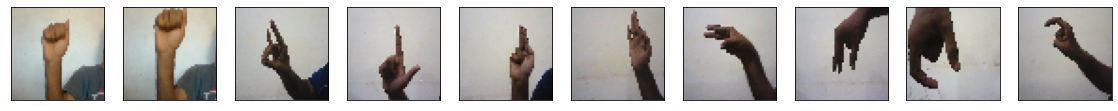

1  1  23  30  17  25  9  27  24  11  

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 50  # how many digits we will display
plt.figure(figsize=(100, 50))
for i in range(10,20):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_train[i].reshape(50,50,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()
for x in range(10,20):
  print(y_train[x],end='  ')

# Building Convlution Neural Network


In [11]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import GlobalAveragePooling2D


In [12]:
model=Sequential()
model.add(Conv2D(40,(5,5),padding="valid",activation='relu',strides = 1 ,input_shape=(50,50,3)))
model.add(Dropout(0.35)) 
model.add(Conv2D(50,(5,5),padding="valid",activation='relu',strides = 1))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(50,(3,3),padding="same",activation='relu',strides=1))
model.add(Conv2D(64,(3,3),padding="valid",activation='relu',strides=1))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25)) 
model.add(Conv2D(128,(2,2),padding="valid", activation='relu', strides=1))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128,(2,2),padding="valid", activation='relu', strides=1))
model.add(Flatten())
model.add(Dense(110,activation='relu'))
model.add(Dense(38, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 40)        3040      
                                                                 
 dropout (Dropout)           (None, 46, 46, 40)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 50)        50050     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 50)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 50)        22550     
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 64)        28864     
                                                        

In [13]:
from time import time
tic= time()
epoch = 30
hist=model.fit(X_train, y_trainHot, validation_split= 0.2, epochs=epoch, batch_size=100, verbose=1)
toc=time()
print("Training Time : {}".format(toc-tic))

Epoch 1/30
10/10 [==============================] - 13s 1s/step - loss: 3.6304 - accuracy: 0.0269 - val_loss: 3.6271 - val_accuracy: 0.0620
Epoch 2/30
10/10 [==============================] - 12s 1s/step - loss: 3.5928 - accuracy: 0.0663 - val_loss: 3.6004 - val_accuracy: 0.0579
Epoch 3/30
10/10 [==============================] - 12s 1s/step - loss: 3.4541 - accuracy: 0.0839 - val_loss: 3.3334 - val_accuracy: 0.1322
Epoch 4/30
10/10 [==============================] - 13s 1s/step - loss: 3.0778 - accuracy: 0.1637 - val_loss: 2.9613 - val_accuracy: 0.2149
Epoch 5/30
10/10 [==============================] - 13s 1s/step - loss: 2.6549 - accuracy: 0.2601 - val_loss: 2.6040 - val_accuracy: 0.2727
Epoch 6/30
10/10 [==============================] - 13s 1s/step - loss: 2.2451 - accuracy: 0.3606 - val_loss: 2.2034 - val_accuracy: 0.3967
Epoch 7/30
10/10 [==============================] - 13s 1s/step - loss: 1.8120 - accuracy: 0.4756 - val_loss: 1.9921 - val_accuracy: 0.4793
Epoch 8/30
10/10 [==

In [25]:
from sklearn import metrics
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred.shape)
metrics.accuracy_score(y_test, y_pred)

(302, 38)
(302,)


0.8807947019867549

In [15]:
 model.save("./pslModel4.h5")

In [16]:
print("classification report:")
print(metrics.classification_report(y_test, y_pred))#, target_names=target_names))


classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.91      1.00      0.95        10
           3       0.83      0.71      0.77        14
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       0.91      0.91      0.91        11
           7       1.00      1.00      1.00         5
           8       0.89      1.00      0.94         8
           9       0.78      0.88      0.82         8
          10       0.88      0.88      0.88         8
          11       1.00      1.00      1.00         6
          12       1.00      0.75      0.86         8
          13       0.89      1.00      0.94         8
          14       1.00      0.86      0.92         7
          15       0.86      0.67      0.75         9
          16       1.00      0.75      0.86        12
          17       0.86      1.00      0.92         6
    

In [17]:
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

confusion matrix: 
[[11  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  1 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  4]]


Text(0.5, 1.0, 'Loss evolution')

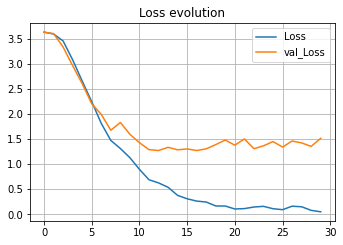

In [18]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy evolution')

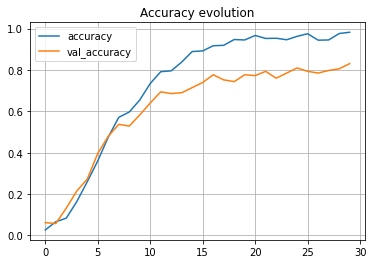

In [19]:
plt.subplot(1, 1, 1)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

ValueError: The number of FixedLocator locations (36), usually from a call to set_ticks, does not match the number of ticklabels (38).

<Figure size 1440x1440 with 0 Axes>

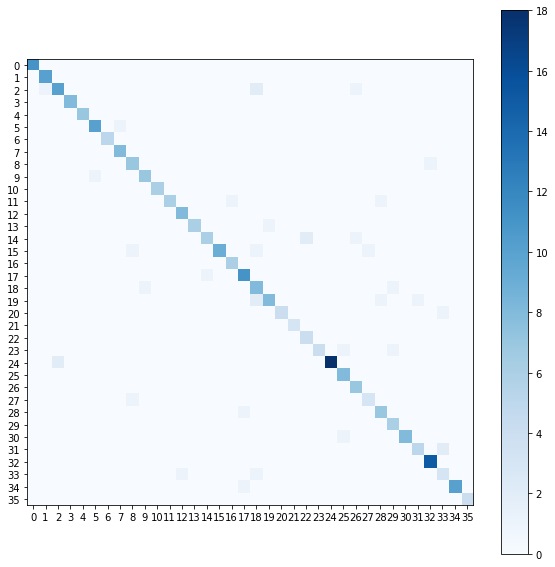

In [27]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        # Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
# Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)
#Specifying class labels
class_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,26,27,28,29,30,31,32,33,34,35,36,37,38]
plt.figure(figsize=(20,20))
plot_confusion_matrix(y_test, y_pred, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()